In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

In [3]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

data=pd.read_csv("D:\\DATA_science\\Data_sets\\pima-indians-diabetes.data.csv",names=names)

In [4]:
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
array=data.values

In [6]:
x=array[:,0:8]
y=array[:,8]

In [7]:
num_folds=10
kfold=KFold(n_splits=10)

In [33]:
model=KNeighborsClassifier(n_neighbors=18)
results=cross_val_score(model,x,y,cv=kfold)

In [34]:
results

array([0.7012987 , 0.79220779, 0.67532468, 0.64935065, 0.79220779,
       0.77922078, 0.83116883, 0.85714286, 0.76315789, 0.76315789])

In [35]:
results.mean()

0.7604237867395763

## Grid Search For Algorithm Tuning

In [36]:
from sklearn.model_selection import GridSearchCV

In [38]:
n_neighbors=np.array(range(1,50))
param_grid=dict(n_neighbors=n_neighbors)

In [40]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [41]:
grid.best_score_

0.7578558696205755

In [42]:
grid.best_params_

{'n_neighbors': 14}

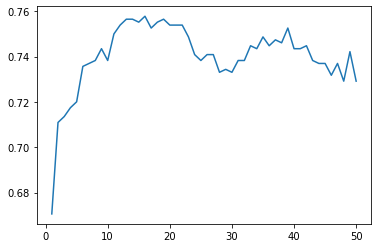

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 51
k_range=range(1,51)
k_scores=[]
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=8)
    k_scores.append(scores.mean())
    
    
# plot to see clearly
plt.plot(k_range,k_scores)
plt.xlabel='value of k for knn'
plt.ylabel='Cross Validated Accuracy'
plt.show()